## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('User_Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
x = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.fit_transform(test_x)

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(train_x,train_y)

LogisticRegression(random_state=0)

In [23]:
y_pred = classifier.predict(test_x)

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy score : ',accuracy_score(test_y,y_pred))

Accuracy score :  0.8875


### Plot Decision Boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


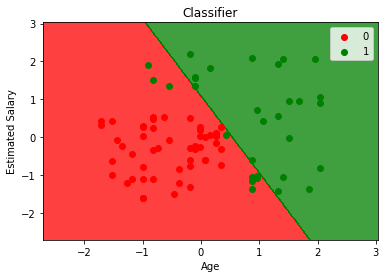

In [32]:
from matplotlib.colors import ListedColormap
x_set ,y_set = test_x, test_y

x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,
                             stop = x_set[:,0].max()+1, step = 0.01),
                  np.arange(start=x_set[:,0].min()-1,
                             stop = x_set[:,0].max()+1, step = 0.01))
plt.contourf(x1,x2,classifier.predict(
    np.array([x1.ravel(), x2.ravel()]).T).reshape(
        x1.shape), alpha = 0.75, cmap= ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0], x_set[y_set==j,1],
               c= ListedColormap(('red', 'green'))(i),label =j)

plt.title('Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()